# Gene Expression cancer RNA-Seq

######  It is the extraction of gene expressions of patients having different types of tumor: BRCA, KIRC, COAD, LUAD and PRAD.

In [8]:
import pandas as pd
import os
os.chdir("C:\Users\User\Desktop\dataa\\a")

In [12]:
from matplotlib import style
import matplotlib.pyplot as plt
style.use("ggplot")

In [33]:
import numpy as np
from sklearn import neighbors, model_selection

In [40]:
df=pd.read_csv("data.csv",index_col=0)
df2=pd.read_csv("labels.csv",index_col=0)

In [59]:
from sklearn.metrics import confusion_matrix as cm

In [52]:
df.columns
df2

,Class
sample_0,PRAD
sample_1,LUAD
sample_2,PRAD
sample_3,PRAD
sample_4,BRCA
sample_5,PRAD
sample_6,KIRC
sample_7,PRAD
sample_8,BRCA
sample_9,PRAD


In [44]:
df

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
sample_0,0.000000,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.000000,0.000000,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
sample_1,0.000000,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.000000,0.000000,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
sample_2,0.000000,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.000000,0.000000,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
sample_3,0.000000,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.000000,0.000000,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
sample_4,0.000000,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.000000,0.000000,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
sample_5,0.000000,3.467853,3.581918,6.620243,9.706829,0.0,7.758510,0.000000,0.000000,0.000000,...,5.726657,8.602588,9.928339,6.096154,9.816001,11.556995,9.244150,9.836473,5.355133,0.000000
sample_6,0.000000,1.224966,1.691177,6.572007,9.640511,0.0,6.754888,0.531868,0.000000,0.000000,...,5.105904,7.927968,9.673966,1.877744,9.802692,13.256060,9.664486,9.244219,8.330912,0.000000
sample_7,0.000000,2.854853,1.750478,7.226720,9.758691,0.0,5.952103,0.000000,0.000000,0.000000,...,5.297833,8.277092,9.599230,5.244290,9.994339,12.670377,9.987733,9.216872,6.551490,0.000000
sample_8,0.000000,3.992125,2.772730,6.546692,10.488252,0.0,7.690222,0.352307,0.000000,4.067604,...,6.721974,9.597533,9.763753,7.933278,10.952880,12.498919,10.389954,10.390255,7.828321,0.000000
sample_9,0.000000,3.642494,4.423558,6.849511,9.464466,0.0,7.947216,0.724214,0.000000,0.000000,...,6.020051,8.712809,10.259096,6.131583,9.923582,11.144295,9.244851,9.484299,4.759151,0.000000


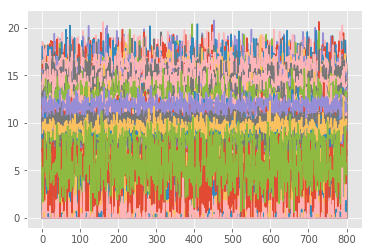

In [28]:
################################### plot of all genes ######################################

plt.plot(np.array(df))
plt.show()

In [39]:
print df2

    Class
0    PRAD
1    LUAD
2    PRAD
3    PRAD
4    BRCA
5    PRAD
6    KIRC
7    PRAD
8    BRCA
9    PRAD
10   BRCA
11   KIRC
12   PRAD
13   BRCA
14   BRCA
15   BRCA
16   LUAD
17   KIRC
18   KIRC
19   PRAD
20   BRCA
21   KIRC
22   LUAD
23   BRCA
24   KIRC
25   LUAD
26   COAD
27   BRCA
28   BRCA
29   BRCA
..    ...
771  LUAD
772  BRCA
773  LUAD
774  KIRC
775  BRCA
776  LUAD
777  KIRC
778  LUAD
779  LUAD
780  LUAD
781  KIRC
782  BRCA
783  PRAD
784  BRCA
785  BRCA
786  KIRC
787  BRCA
788  PRAD
789  KIRC
790  BRCA
791  BRCA
792  BRCA
793  BRCA
794  PRAD
795  LUAD
796  BRCA
797  LUAD
798  COAD
799  PRAD
800  PRAD

[801 rows x 1 columns]


In [53]:
x=np.array(df)
y=np.array(df2["Class"])

In [58]:
x_train,x_test,y_train,y_test= model_selection.train_test_split(x,y,test_size=0.20,random_state=41)
clf=neighbors.KNeighborsClassifier(n_neighbors=25)
clf.fit(x_train,y_train)
accuracy=clf.score(x_test,y_test)
print accuracy

0.9937888198757764


In [60]:
y_pred=clf.predict(x_test)
print cm(y_test,y_pred)

[[59  0  0  0  0]
 [ 0 13  0  0  0]
 [ 1  0 37  0  0]
 [ 0  0  0 28  0]
 [ 0  0  0  0 23]]


#### confusion matrix has been observed with y_test and y_pred 

## Result- KIRC class has been misclassified as BRCA

In [65]:
from collections import Counter

In [66]:
Counter(y_test)

Counter({'BRCA': 59, 'COAD': 13, 'KIRC': 38, 'LUAD': 28, 'PRAD': 23})

In [67]:
nneighbors_accuracy=[]
for i in range(1,51):
    clf=neighbors.KNeighborsClassifier(n_neighbors=i)
    clf.fit(x_train,y_train)
    accuracy=clf.score(x_test,y_test)
    nneighbors_accuracy.append(accuracy)
print nneighbors_accuracy

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9937888198757764, 0.9937888198757764, 0.9937888198757764, 1.0, 0.9937888198757764, 0.9937888198757764, 0.9937888198757764, 0.9937888198757764, 0.9937888198757764, 0.9937888198757764, 0.9937888198757764, 0.9937888198757764, 0.9937888198757764, 0.9937888198757764, 0.9937888198757764, 0.9937888198757764, 0.9937888198757764, 0.9937888198757764, 0.9937888198757764, 0.9937888198757764, 0.9937888198757764, 0.9937888198757764, 0.9937888198757764, 0.9937888198757764, 0.9937888198757764, 0.9937888198757764, 0.9937888198757764, 0.9937888198757764, 0.9937888198757764, 0.9937888198757764, 0.9937888198757764, 0.9937888198757764, 0.9937888198757764, 0.9937888198757764, 0.9937888198757764, 0.9937888198757764, 0.9937888198757764, 0.9937888198757764, 0.9937888198757764, 0.9937888198757764, 0.9937888198757764, 0.9937888198757764, 0.9937888198757764]


###### above is the list which contains different accuracies acquired by different neighbors

In [68]:
df2["Class"].value_counts()

BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: Class, dtype: int64